In [8]:
!pip install python-dotenv



In [11]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00


In [33]:
pip install langchain_anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 14.0 MB/s eta 0:00:00


In [41]:
from dotenv import load_dotenv
import os
load_dotenv("keys.env")

# Fetch API keys
groq_api_key = os.getenv("groq_api_key")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
ACTIVELOOP_TOKEN = os.getenv("ACTIVELOOP_TOKEN")


In [15]:
from langchain.embeddings import HuggingFaceEmbeddings
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
index = faiss.IndexFlatL2(len(embeddings.embed_query(" ")))
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={}
)



<ipython-input-15-a163cbf94182>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or d

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
from langchain_community.document_loaders.csv_loader import CSVLoader
from pathlib import Path
security_logs_file_path = ('/content/security_logs.csv')
security_logs_loader = CSVLoader(file_path=security_logs_file_path)
security_logs_docs = security_logs_loader.load_and_split()

In [19]:
Application_logs_file_path = ('/content/Application_logs.csv')
Application_logs_loader = CSVLoader(file_path=Application_logs_file_path)
Application_logs_docs = Application_logs_loader.load_and_split()

In [20]:
Network_logs_file_path = ('/content/Network_logs.csv')
Network_logs_loader = CSVLoader(file_path=Network_logs_file_path)
Network_logs_docs = Network_logs_loader.load_and_split()

In [21]:
System_logs_file_path = ('/content/System_logs.csv')
System_logs_loader = CSVLoader(file_path=System_logs_file_path)
System_logs_docs = System_logs_loader.load_and_split()

In [23]:
vector_store.add_documents(documents=security_logs_docs)
vector_store.add_documents(documents=Application_logs_docs)
vector_store.add_documents(documents=Network_logs_docs)
vector_store.add_documents(documents=System_logs_docs)




['f5f51d8a-823b-49bc-84e5-396bd687a86b',
 '11268e80-6639-4614-8ac3-df14fc32fa59',
 'dfd31bcc-c7c8-48c8-96ec-d6234bba7864',
 'd46709c7-a2f7-4364-be4a-723cda6cbbad',
 'e7bd6a65-21e5-4383-87a1-c97834de980a',
 'b936e844-da59-43de-bcf4-6c0023d653c9',
 '7b39aa79-ffd5-4c2b-9a6d-1bb778213f98',
 '3f11d5b8-20a0-47e1-86d7-b850db747dc7',
 '419df33f-bd57-48f8-814b-0dc28961bd0b',
 'c8c8a3fb-7029-4f08-acaf-4f12e78a4b98',
 'ac457f65-e9e0-4ebc-8b56-ba7b11c6272a',
 '224acb80-3827-4795-8f1e-d2ab7c5c51ba',
 '1c780120-5b8a-405d-acfe-907ed385cf52',
 'db8dc9f8-b209-42dd-b2ee-5001d3e06a0d',
 'f56c65c0-11f1-41c0-9b46-e9fada2684d4',
 'd5051666-204e-49fe-8bbb-19cd7afc9746',
 '01aa2804-189d-4943-817e-2ddd543c6063',
 '5eb7b657-4025-465d-a62c-6f740b3ce334',
 '12ba860c-6ae9-4729-9b16-583a30560bd8',
 'bfb683e2-4fe8-48a6-a0e1-9505184818eb',
 '55d7b478-5f45-4bb3-affe-3c4529efd7dd',
 'db4bd188-09e9-4a65-959f-5c4f986458e6',
 'a3d715e6-7997-46ad-a803-16fbdca75614',
 '44d06c16-d309-496c-9264-825d22202441',
 '303539ce-7def-

In [24]:
vector_store.save_local("faiss_index")

In [ ]:
results = vector_store.similarity_search(
    query,
    k=2
)

In [25]:
def search_private_docs(query):
    results =vector_store.similarity_search(query,k=5)
    return "\n\n".join([doc.page_content for doc in results])


In [26]:
from langchain.tools import Tool
private_doc_tool = Tool(
    name="PrivateDocumentSearch",
    func=search_private_docs,
    description="Retrieve information from private documents stored in Faiss these documents contain system, application, network, security logs."
)

In [47]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL

tavily_tool = TavilySearchResults(max_results=5)

# This executes code locally, which can be unsafe


In [60]:
from typing import Literal
from typing_extensions import TypedDict
from langchain_groq import ChatGroq
from langchain_anthropic import ChatAnthropic
from langgraph.graph import MessagesState, END
from langgraph.types import Command
from langchain_ollama import ChatOllama

members = ["application", "security","system", "network"]
# Our team supervisor is an LLM node. It just picks the next agent to process
# and decides when the work is completed
options = members + ["FINISH"]

system_prompt = (
    "You are a cybersecurity manager with expertise in security. "
    "Your job is to oversee and manage the tasks performed by your worker agents. "
    "You are tasked with responding to user requests and assigning the relevant tasks to "
    "the appropriate worker agent based on their expertise. The worker agents have the following specialties:\n"
    "Given the following user request, respond with the worker agent to assign the task to next. Each worker will perform a specific task and respond with their findings. When the task is completed, respond with FINISH.\n"
    "Please ensure all responses are clear and relevant to the specific agent's expertise."
    "\n\n"
)


class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""

    next: Literal[*options]
import groq
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm


class State(MessagesState):
    next: str

def supervisor_node(state: State) -> Command[Literal[*members, "__end__"]]:
    messages = [
        {"role": "system", "content": system_prompt},
    ] + state["messages"]
    response = llm.with_structured_output(Router).invoke(messages)
    if response is None:
        print("Warning: LLM invocation returned None.")
        return  # or raise ValueError("LLM invocation failed.")
    goto = response["next"]
    if goto == "FINISH":
        goto = END

    return Command(goto=goto, update={"next": goto})

In [61]:
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import create_react_agent

# Application Agent
application_prompt = (
    "You are an Application Agent. Your task is to focus on application-related issues."
    " You should analyze application logs, performance data, troubleshoot errors,"
    " and provide insights or solutions related to application problems."
    " Please ensure your response is detailed and includes relevant information."
)
application_agent = create_react_agent(
    llm, tools=[tavily_tool,private_doc_tool], prompt=application_prompt
)

def application_node(state: State) -> Command[Literal["supervisor"]]:
    result = application_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="application")
            ]
        },
        goto="supervisor",
    )



# Security Agent
security_prompt = (
    "You are a Security Agent. Your task is to focus on security-related issues."
    " You should analyze security logs, assess potential breaches, identify threats,"
    " and respond with actionable insights or solutions regarding security incidents."
    " Please make sure your response includes relevant security-related findings."
)
security_agent = create_react_agent(
    llm, tools=[tavily_tool,private_doc_tool], prompt=security_prompt
)

def security_node(state: State) -> Command[Literal["supervisor"]]:
    result = security_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="security")
            ]
        },
        goto="supervisor",
    )

# System Agent
system_prompt = (
    "You are a System Agent. Your task is to focus on system-related issues."
    " You should look into system logs, analyze performance issues, identify hardware"
    " failures, diagnose operating system errors, and suggest solutions for system optimization."
    " Please make sure your response addresses system-level concerns and potential fixes."
)

system_agent = create_react_agent(
    llm, tools=[tavily_tool,private_doc_tool], prompt=system_prompt
)

def system_node(state: State) -> Command[Literal["supervisor"]]:
    result = system_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="system")
            ]
        },
        goto="supervisor",
    )

# Network Agent
network_prompt = (
    "You are a Network Agent. Your task is to focus on network-related issues."
    " You should analyze network logs, monitor connectivity issues, troubleshoot"
    " bandwidth problems, and handle network security incidents. Provide insights or"
    " solutions for improving network performance and addressing network-related errors."
)

network_agent = create_react_agent(
    llm, tools=[tavily_tool,private_doc_tool], prompt=network_prompt
)

def network_node(state: State) -> Command[Literal["supervisor"]]:
    result = network_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="network")
            ]
        },
        goto="supervisor",
    )

# Build the state graph
builder = StateGraph(State)
builder.add_edge(START, "supervisor")
builder.add_node("supervisor", supervisor_node)
builder.add_node("application", application_node)
builder.add_node("security", security_node)
builder.add_node("system", system_node)
builder.add_node("network", network_node)
graph = builder.compile()

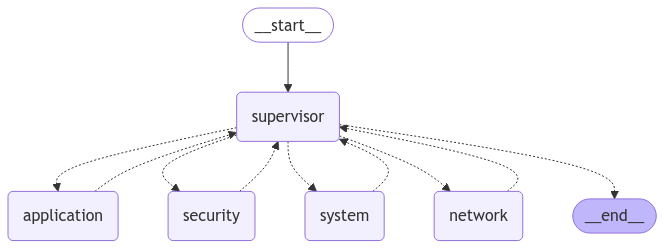

In [62]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [63]:
for s in graph.stream(
    {"messages": [("user", "Do you see any potential security breaches")]}, subgraphs=True
):
    print(s)
    print("----")

((), {'supervisor': {'next': 'security'}})
----
(('security:f0f526c7-0eec-9fbf-3257-9f71720ec7dd',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2ezs', 'function': {'arguments': '{"__arg1":"security logs"}', 'name': 'PrivateDocumentSearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 1172, 'total_tokens': 1256, 'completion_time': 0.152727273, 'prompt_time': 0.04144712, 'queue_time': 0.277154643, 'total_time': 0.194174393}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9417a250-5168-4551-a098-3b15bbcc3f55-0', tool_calls=[{'name': 'PrivateDocumentSearch', 'args': {'__arg1': 'security logs'}, 'id': 'call_2ezs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1172, 'output_tokens': 84, 'total_tokens': 1256})]}})
----
(('security:f0f526c7-0eec-9fbf-3257-9f71720ec7dd',), {'tools': {'messages': [ToolMe